#                        SECTION - A                            
Python And Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [7]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
df_duplicated = pd.concat([df, df])
display(df_duplicated.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
display(df.isnull().sum())

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [10]:
df_clean = df.copy()


In [11]:
df_clean["gender"] = df_clean["gender"].str.capitalize()

In [12]:
df_clean["test preparation course"] = df_clean["test preparation course"].replace({
    "none": "None",
    "completed": "Completed"
})

In [13]:
education_map = {
    "some high school": "High School or Less",
    "high school": "High School or Less",
    "associate's degree": "Undergraduate",
    "some college": "Undergraduate",
    "bachelor's degree": "Undergraduate",
    "master's degree": "Postgraduate"
}
df_clean["parental level of education"] = df_clean["parental level of education"].replace(education_map)


In [14]:
df_clean["race/ethnicity"] = df_clean["race/ethnicity"].replace({
    "group A": "Ethnicity A",
    "group B": "Ethnicity B",
    "group C": "Ethnicity C",
    "group D": "Ethnicity D",
    "group E": "Ethnicity E"
})


In [15]:
print(df_clean.head())

   gender race/ethnicity parental level of education         lunch  \
0  Female    Ethnicity B               Undergraduate      standard   
1  Female    Ethnicity C               Undergraduate      standard   
2  Female    Ethnicity B                Postgraduate      standard   
3    Male    Ethnicity A               Undergraduate  free/reduced   
4    Male    Ethnicity C               Undergraduate      standard   

  test preparation course  math score  reading score  writing score  
0                    None          72             72             74  
1               Completed          69             90             88  
2                    None          90             95             93  
3                    None          47             57             44  
4                    None          76             78             75  


In [16]:
df["Average Score"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [17]:
def categorize_performance(score):
    if score < 60:
        return "Low"
    elif score < 80:
        return "Medium"
    else:
        return "High"

df["Performance Category"] = df["Average Score"].apply(categorize_performance)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,Performance Category
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Medium
1,female,group C,some college,standard,completed,69,90,88,82.333333,High
2,female,group B,master's degree,standard,none,90,95,93,92.666667,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Low
4,male,group C,some college,standard,none,76,78,75,76.333333,Medium


In [18]:
prep_effect = df.groupby("test preparation course")[["math score", "reading score", "writing score", "Average Score"]].mean()
print(prep_effect)


                         math score  reading score  writing score  \
test preparation course                                             
completed                 69.695531      73.893855      74.418994   
none                      64.077882      66.534268      64.504673   

                         Average Score  
test preparation course                 
completed                    72.669460  
none                         65.038941  


# **SECTION C:**
# Exploratory Data Analysis & Descriptive Statistics **bold text**

In [19]:
import matplotlib as plt
import seaborn as sns

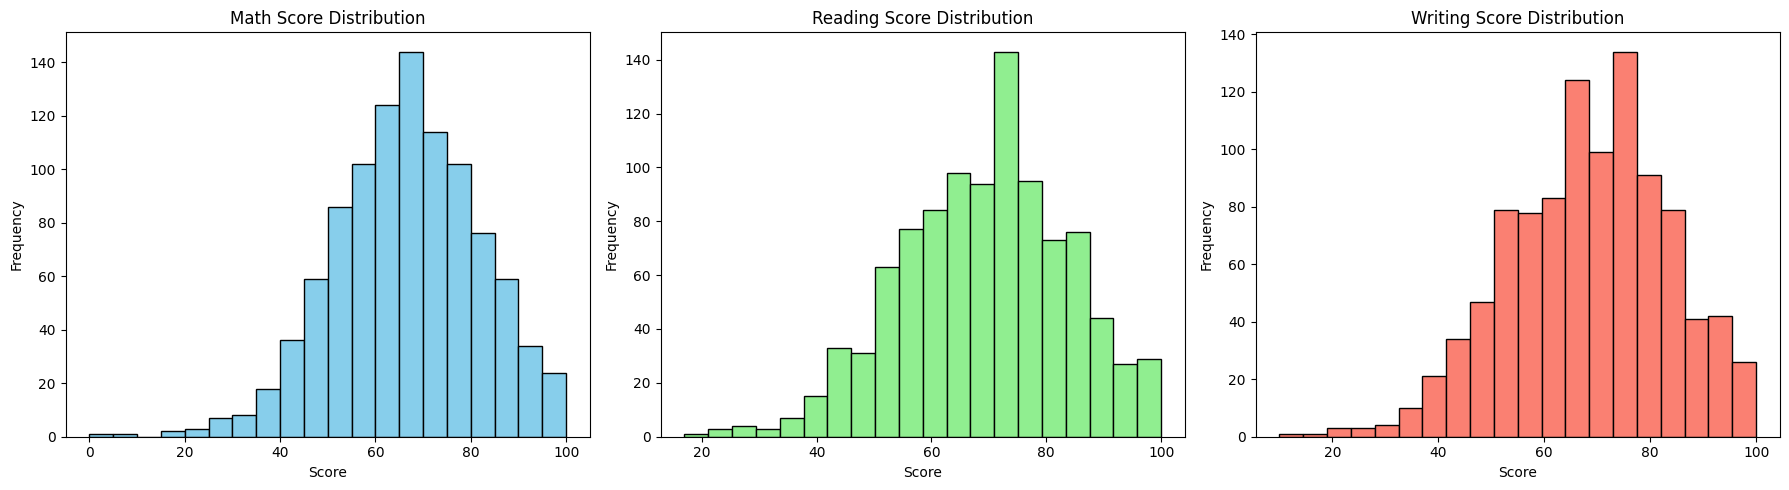

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df['math score'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Math Score Distribution')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['reading score'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Reading Score Distribution')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['writing score'], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Writing Score Distribution')
axes[2].set_xlabel('Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

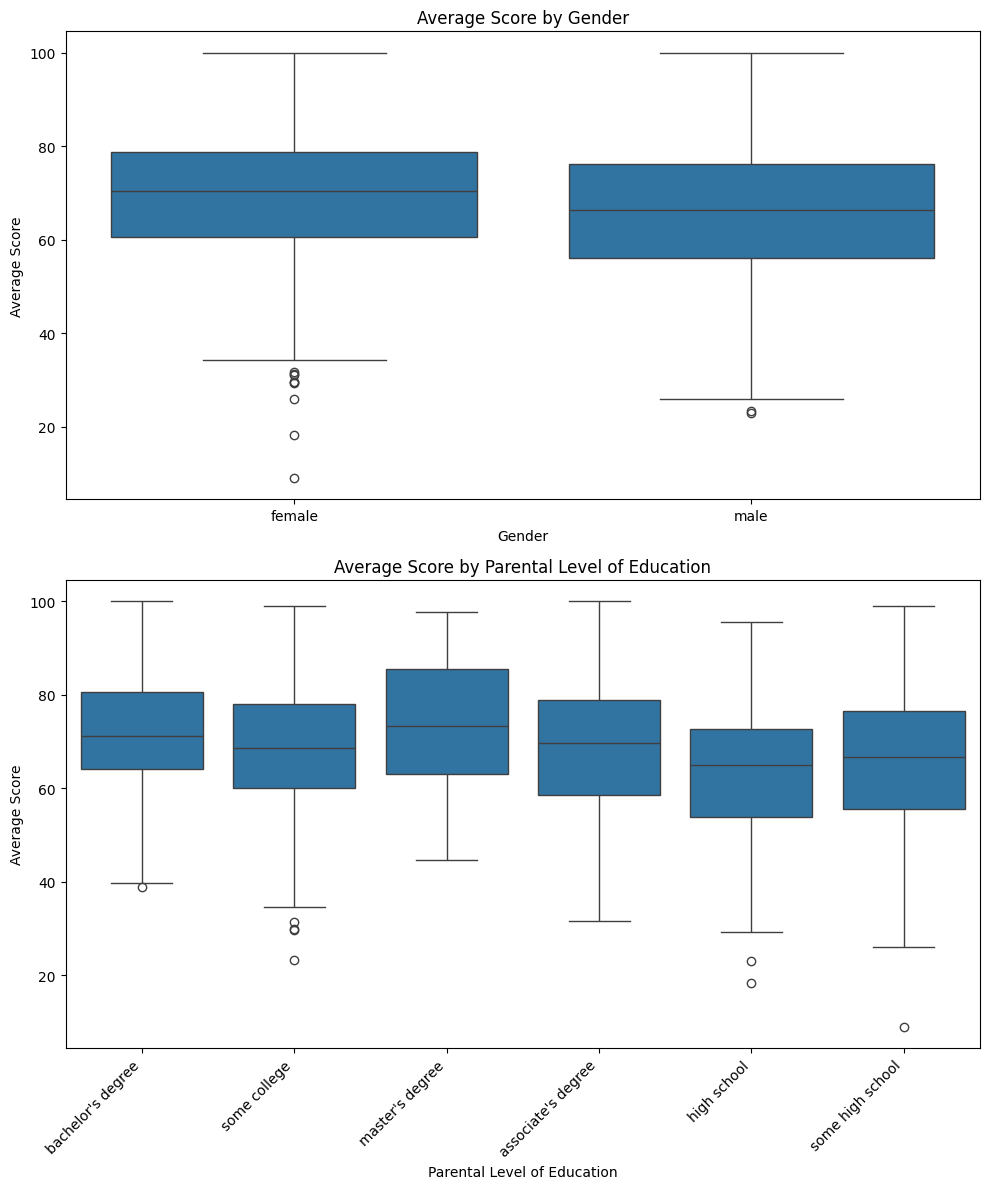

In [21]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.boxplot(x='gender', y='Average Score', data=df, ax=axes[0])
axes[0].set_title('Average Score by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Score')

sns.boxplot(x='parental level of education', y='Average Score', data=df, ax=axes[1])
axes[1].set_title('Average Score by Parental Level of Education')
axes[1].set_xlabel('Parental Level of Education')
axes[1].set_ylabel('Average Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

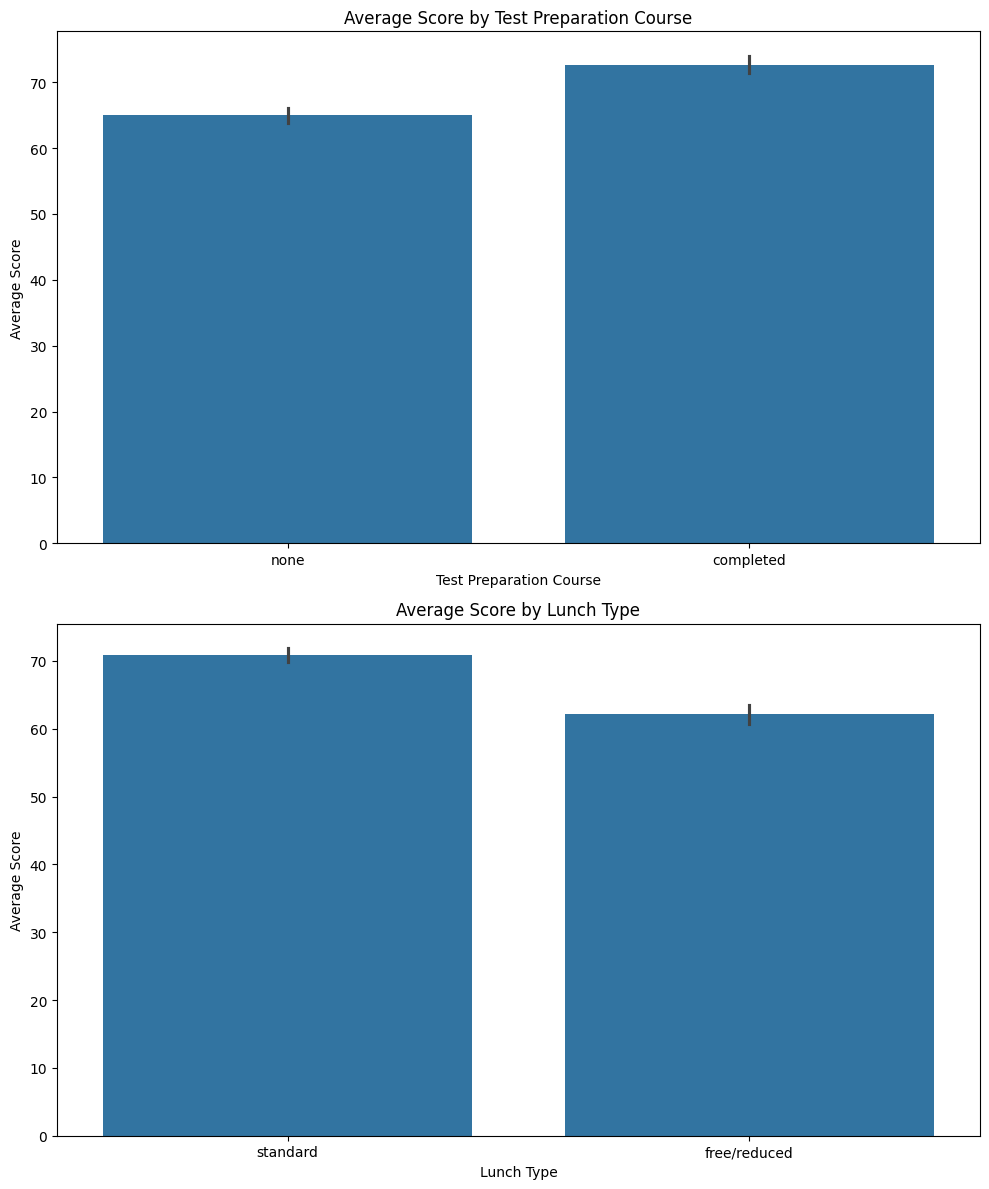

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(x='test preparation course', y='Average Score', data=df, ax=axes[0])
axes[0].set_title('Average Score by Test Preparation Course')
axes[0].set_xlabel('Test Preparation Course')
axes[0].set_ylabel('Average Score')

sns.barplot(x='lunch', y='Average Score', data=df, ax=axes[1])
axes[1].set_title('Average Score by Lunch Type')
axes[1].set_xlabel('Lunch Type')
axes[1].set_ylabel('Average Score')

plt.tight_layout()
plt.show()

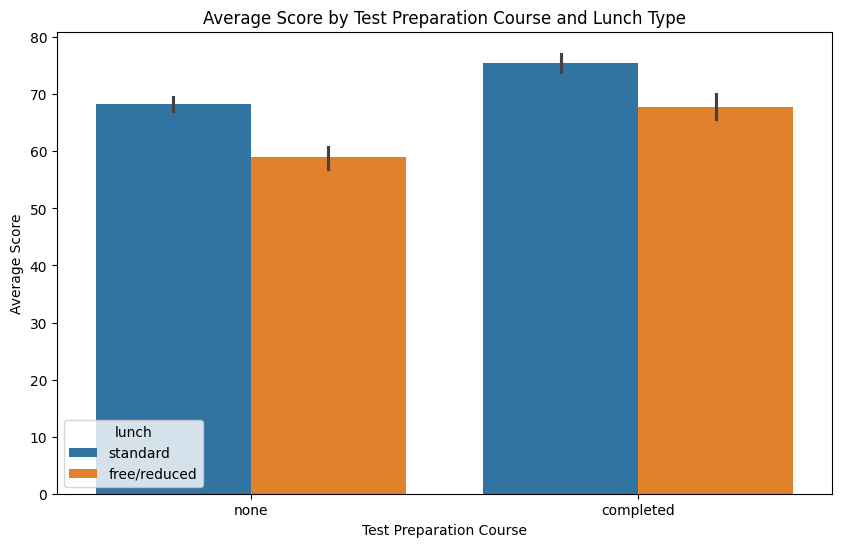

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='test preparation course', y='Average Score', hue='lunch', data=df)
plt.title('Average Score by Test Preparation Course and Lunch Type')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.show()

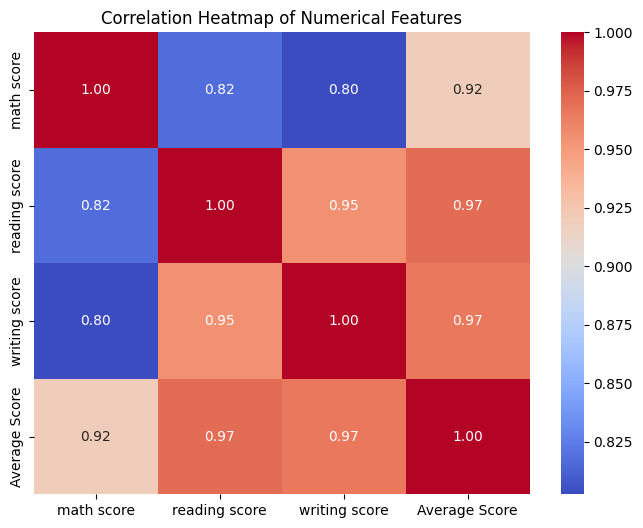

In [24]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

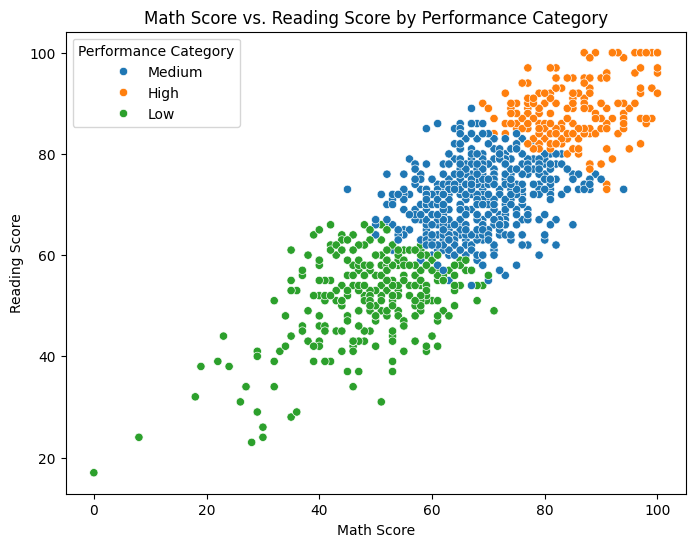

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', hue='Performance Category', data=df)
plt.title('Math Score vs. Reading Score by Performance Category')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

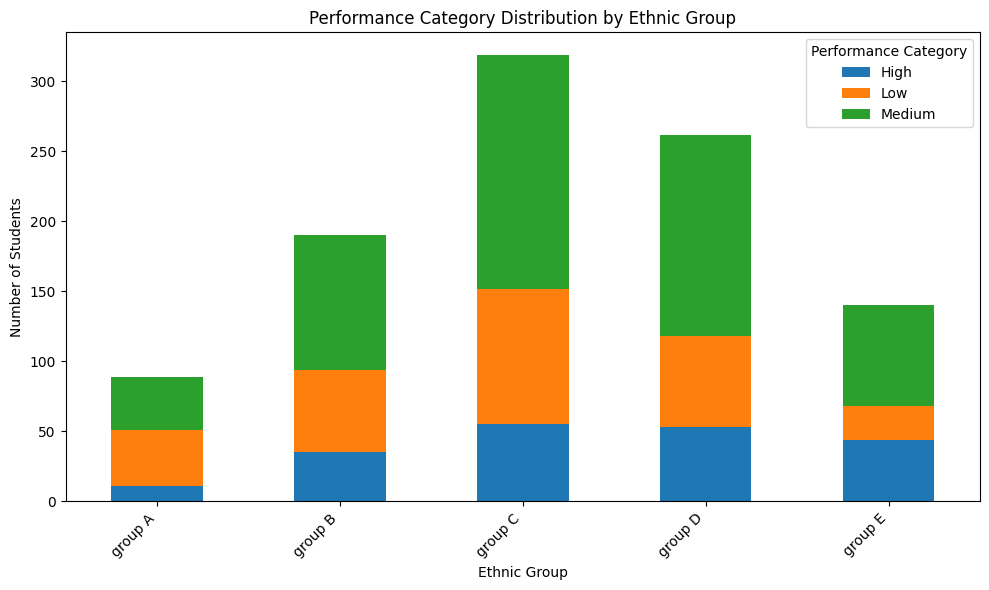

In [26]:
performance_by_ethnicity = df.groupby('race/ethnicity')['Performance Category'].value_counts().unstack()
performance_by_ethnicity.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Performance Category Distribution by Ethnic Group')
plt.xlabel('Ethnic Group')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

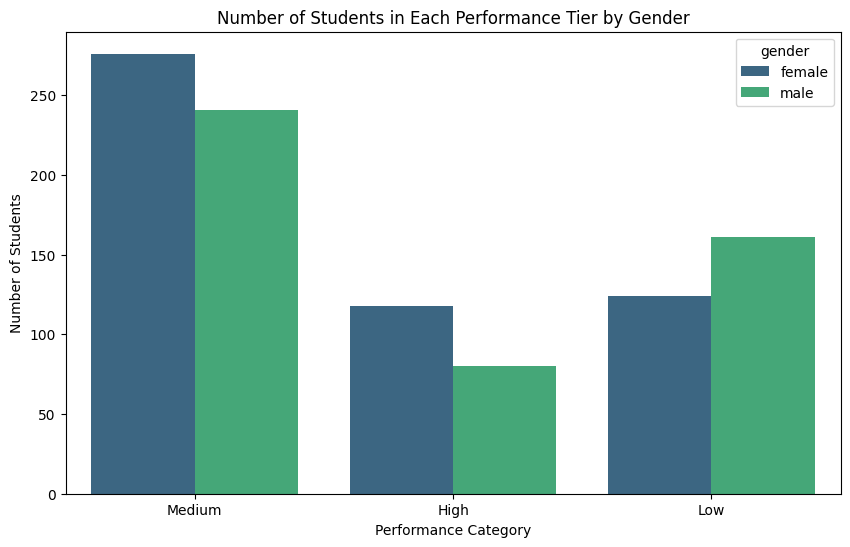

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Performance Category', hue='gender', data=df, palette='viridis')
plt.title('Number of Students in Each Performance Tier by Gender')
plt.xlabel('Performance Category')
plt.ylabel('Number of Students')
plt.show()

# Descriptive Statistics:

In [28]:
display(df[['math score', 'reading score', 'writing score']].describe())

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
print("Math Score:")
print("Mean:", df['math score'].mean())
print("Median:", df['math score'].median())
print("Variance:", df['math score'].var())
print("Standard Deviation:", df['math score'].std())

print("\nReading Score:")
print("Mean:", df['reading score'].mean())
print("Median:", df['reading score'].median())
print("Variance:", df['reading score'].var())
print("Standard Deviation:", df['reading score'].std())

print("\nWriting Score:")
print("Mean:", df['writing score'].mean())
print("Median:", df['writing score'].median())
print("Variance:", df['writing score'].var())
print("Standard Deviation:", df['writing score'].std())

Math Score:
Mean: 66.089
Median: 66.0
Variance: 229.91899799799847
Standard Deviation: 15.163080096009468

Reading Score:
Mean: 69.169
Median: 70.0
Variance: 213.1656046046047
Standard Deviation: 14.60019193725222

Writing Score:
Mean: 68.054
Median: 69.0
Variance: 230.90799199199168
Standard Deviation: 15.195657010869642


In [30]:
# Average scores by lunch type
average_scores_by_lunch = df.groupby('lunch')[['math score', 'reading score', 'writing score', 'Average Score']].mean()
print("Average Scores by Lunch Type:")
display(average_scores_by_lunch)

# Average scores by test preparation course
average_scores_by_prep = df.groupby('test preparation course')[['math score', 'reading score', 'writing score', 'Average Score']].mean()
print("\nAverage Scores by Test Preparation Course:")
display(average_scores_by_prep)

Average Scores by Lunch Type:


,math score,reading score,writing score,Average Score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209



Average Scores by Test Preparation Course:


,math score,reading score,writing score,Average Score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


In [31]:
# Calculate coefficient of variation for each score
cov_math = df['math score'].std() / df['math score'].mean()
cov_reading = df['reading score'].std() / df['reading score'].mean()
cov_writing = df['writing score'].std() / df['writing score'].mean()

print(f"Coefficient of Variation for Math Score: {cov_math:.2f}")
print(f"Coefficient of Variation for Reading Score: {cov_reading:.2f}")
print(f"Coefficient of Variation for Writing Score: {cov_writing:.2f}")

Coefficient of Variation for Math Score: 0.23
Coefficient of Variation for Reading Score: 0.21
Coefficient of Variation for Writing Score: 0.22


In [32]:
# Define a list of categorical columns to analyze
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Iterate through each categorical column
for col in categorical_cols:
    # Print the title for the current factor
    print(f"Average Score by {col.replace('_', ' ').title()}:")

    # Group the DataFrame by the current column and calculate the mean of 'Average Score',
    # then sort the results in descending order to see the highest averages first
    avg_score = df.groupby(col)['Average Score'].mean().sort_values(ascending=False)

    # Display the calculated average scores for the current factor
    display(avg_score)

    # Print a separator line for better readability
    print("-" * 30)

# Provide a summary and ranking based on the observed average scores
print("\nTo identify the top 3 factors, we need to look at which categories within these factors have the highest average scores and the magnitude of the difference between categories.")
print("Based on the averages above, here's a potential ranking of factors associated with higher performance:")
print("1. Test Preparation Course (Completed vs None) - This factor shows a significant difference in average scores.")
print("2. Lunch (Standard vs Free/Reduced) - This factor also shows a notable difference in average scores.")
print("3. Parental Level of Education (Postgraduate/Undergraduate vs High School or Less) - While there are variations, the higher education levels tend to have higher average scores.")

Average Score by Gender:


,Average Score
gender,
female,69.569498
male,65.837483


------------------------------
Average Score by Race/Ethnicity:


,Average Score
race/ethnicity,
group E,72.752381
group D,69.179389
group C,67.131661
group B,65.468421
group A,62.992509


------------------------------
Average Score by Parental Level Of Education:


,Average Score
parental level of education,
master's degree,73.598870
bachelor's degree,71.923729
associate's degree,69.569069
some college,68.476401
some high school,65.108007
high school,63.096939


------------------------------
Average Score by Lunch:


,Average Score
lunch,
standard,70.837209
free/reduced,62.199061


------------------------------
Average Score by Test Preparation Course:


,Average Score
test preparation course,
completed,72.669460
none,65.038941


------------------------------

To identify the top 3 factors, we need to look at which categories within these factors have the highest average scores and the magnitude of the difference between categories.
Based on the averages above, here's a potential ranking of factors associated with higher performance:
1. Test Preparation Course (Completed vs None) - This factor shows a significant difference in average scores.
2. Lunch (Standard vs Free/Reduced) - This factor also shows a notable difference in average scores.
3. Parental Level of Education (Postgraduate/Undergraduate vs High School or Less) - While there are variations, the higher education levels tend to have higher average scores.


In [33]:
# Define a list of categorical columns to analyze
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Iterate through each categorical column
for col in categorical_cols:
    # Print the title for the current factor
    print(f"Variance of Average Score by {col.replace('_', ' ').title()}:")

    # Group the DataFrame by the current column and calculate the variance of 'Average Score',
    # then sort the results in descending order to see the largest variances first
    avg_score_variance = df.groupby(col)['Average Score'].var().sort_values(ascending=False)

    # Display the calculated variances for the current factor
    display(avg_score_variance)

    # Print a separator line for better readability
    print("-" * 30)

print("\nTo determine which feature has the largest score variance, we need to compare the variances across all the categories of all the analyzed features.")
print("Looking at the variances above, 'parental level of education' seems to have categories with higher variances compared to other features.")

Variance of Average Score by Gender:


,Average Score
gender,
female,211.464213
male,187.658218


------------------------------
Variance of Average Score by Race/Ethnicity:


,Average Score
race/ethnicity,
group B,217.035741
group E,212.139683
group A,208.646408
group C,192.438236
group D,175.636066


------------------------------
Variance of Average Score by Parental Level Of Education:


,Average Score
parental level of education,
some high school,224.522601
bachelor's degree,194.507903
some college,187.990799
associate's degree,186.893901
master's degree,184.987662
high school,182.535854


------------------------------
Variance of Average Score by Lunch:


,Average Score
lunch,
free/reduced,209.043125
standard,173.883914


------------------------------
Variance of Average Score by Test Preparation Course:


,Average Score
test preparation course,
none,201.262652
completed,169.962333


------------------------------

To determine which feature has the largest score variance, we need to compare the variances across all the categories of all the analyzed features.
Looking at the variances above, 'parental level of education' seems to have categories with higher variances compared to other features.


# SECTION E:
# Machine Learning

Linear Regression Evaluation:
MAE: 10.49, MSE: 179.60, R²: 0.16

Random Forest Regressor Evaluation:
MAE: 11.48, MSE: 218.36, R²: -0.02



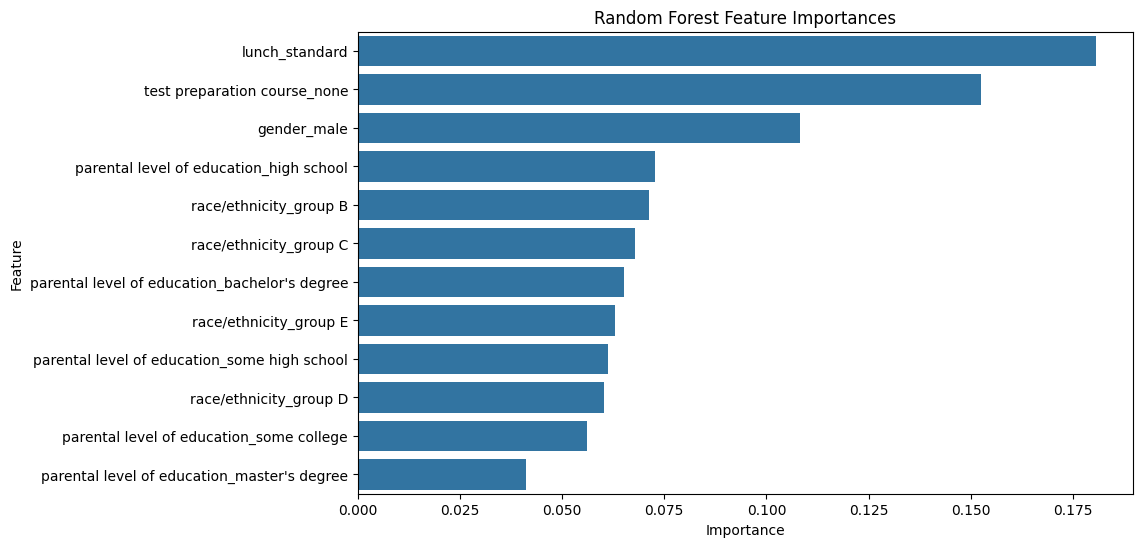

In [34]:
# --- Step 1: Import libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Step 2: Load dataset ---
# If using Colab, you can upload your CSV:
# from google.colab import files
# uploaded = files.upload()
df = pd.read_csv('StudentsPerformance.csv')  # replace with your file path

# --- Step 3: Create target variable ---
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

# --- Step 4: Select features (demographic features) ---
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df['average_score']  # or df['total_score']

# --- Step 5: One-hot encode categorical variables ---
X_encoded = pd.get_dummies(X, drop_first=True)

# --- Step 6: Split data into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# --- Step 7: Scale features (optional for Random Forest but needed for Linear Regression) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 8: Train Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# --- Step 9: Train Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # RF does not require scaled features
y_pred_rf = rf_model.predict(X_test)

# --- Step 10: Evaluate models ---
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# --- Optional: Feature importance for Random Forest ---
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importances')
plt.show()


/tmp/ipython-input-3318239703.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-3318239703.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-3318239703.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

Logistic Regression Classification Report:

              precision    recall  f1-score   support

        High       0.25      0.03      0.06        31
         Low       0.42      0.27      0.33        62
      Medium       0.54      0.79      0.65       107

    accuracy                           0.52       200
   macro avg       0.41      0.37      0.35       200
weighted avg       0.46      0.52      0.46       200

Confusion Matrix:


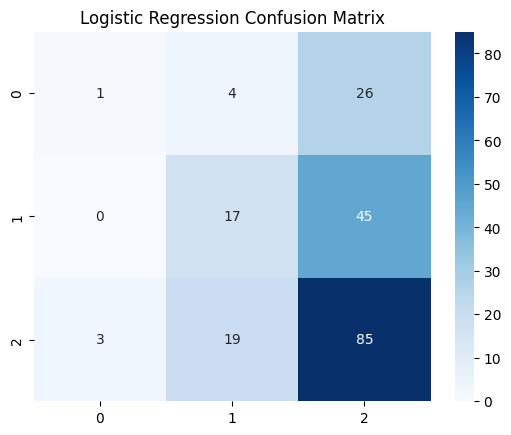

Decision Tree Classification Report:

              precision    recall  f1-score   support

        High       0.23      0.35      0.28        31
         Low       0.33      0.35      0.34        62
      Medium       0.49      0.40      0.44       107

    accuracy                           0.38       200
   macro avg       0.35      0.37      0.36       200
weighted avg       0.40      0.38      0.39       200

Confusion Matrix:


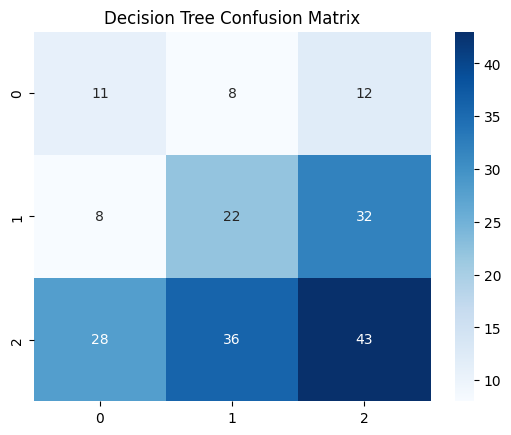

Random Forest Classification Report:

              precision    recall  f1-score   support

        High       0.21      0.19      0.20        31
         Low       0.36      0.29      0.32        62
      Medium       0.54      0.61      0.57       107

    accuracy                           0.45       200
   macro avg       0.37      0.36      0.36       200
weighted avg       0.43      0.45      0.44       200

Confusion Matrix:


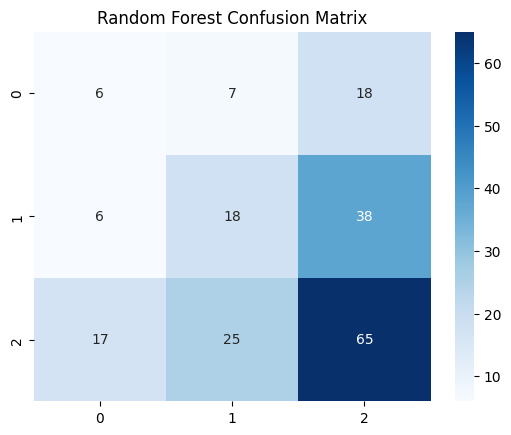

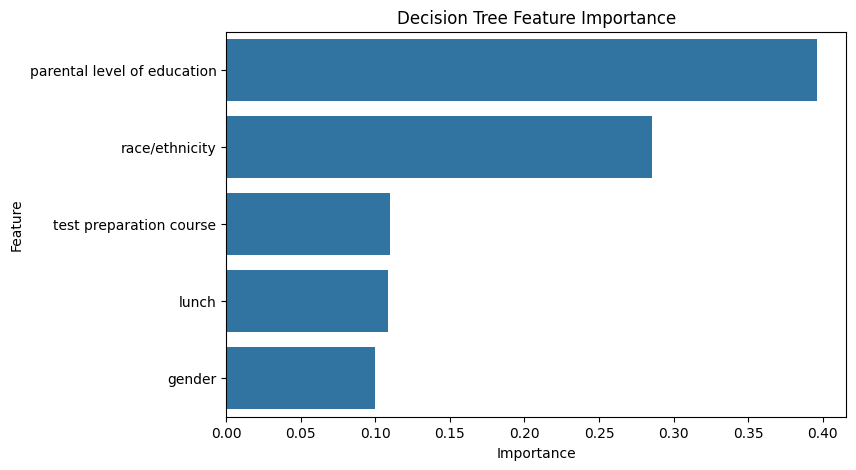

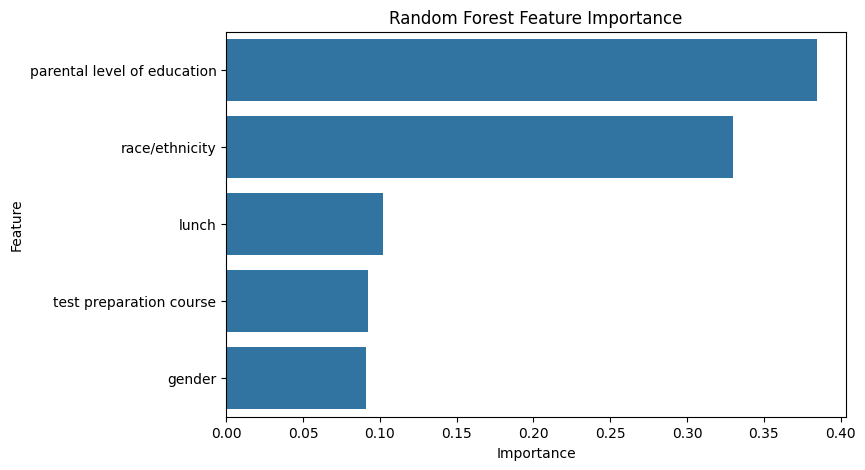

In [35]:
# --- Step 1: Import libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Load dataset ---
df = pd.read_csv('StudentsPerformance.csv')  # replace with your file path

# --- Step 3: Define performance buckets based on total score ---
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

def performance_bucket(score):
    if score < 180:   # roughly <60 per subject
        return 'Low'
    elif score < 240: # roughly 60-80 per subject
        return 'Medium'
    else:             # roughly 80-100 per subject
        return 'High'

df['performance'] = df['total_score'].apply(performance_bucket)

# --- Step 4: Select only original demographic features ---
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df['performance']

# --- Step 5: Label encode categorical variables ---
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# --- Step 6: Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 7: Scale features for Logistic Regression ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 8: Train Logistic Regression ---
lr_model = LogisticRegression(multi_class='multinomial', max_iter=500)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# --- Step 9: Train Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# --- Step 10: Train Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Step 11: Evaluate models ---
def evaluate_classification(y_true, y_pred, model_name):
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

evaluate_classification(y_test, y_pred_lr, "Logistic Regression")
evaluate_classification(y_test, y_pred_dt, "Decision Tree")
evaluate_classification(y_test, y_pred_rf, "Random Forest")

# --- Step 12: Feature importance for tree-based models ---
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f"{model_name} Feature Importance")
    plt.show()

plot_feature_importance(dt_model, "Decision Tree")
plot_feature_importance(rf_model, "Random Forest")


# SQL Queries

-- List top 5 students with highest average scores.

SELECT *,
           ("math score" + "reading score" + "writing score") / 3.0 AS average_score
 FROM StudentsPerformance
 ORDER BY average_score DESC
 LIMIT 5;

-- Find the average math, reading, and writing scores by gender.

SELECT gender,
        AVG("math score") AS avg_math,
        AVG("reading score") AS avg_reading,
        AVG("writing score") AS avg_writing
	FROM StudentsPerformance
 GROUP BY gender;

-- Compare average scores of students who completed test prep vs. those who didn’t.

 SELECT "test preparation course",
        AVG("math score") AS avg_math,
        AVG("reading score") AS avg_reading,
       AVG("writing score") AS avg_writing
 FROM StudentsPerformance
 GROUP BY "test preparation course";

-- Count how many students fall into each performance category.

SELECT CASE
           WHEN ("math score" + "reading score" + "writing score") / 3.0 < 60 THEN 'Low'
           WHEN ("math score" + "reading score" + "writing score") / 3.0 < 80 THEN 'Medium'
           ELSE 'High'
       END AS performance_category,
       COUNT(*) AS num_students
FROM StudentsPerformance
GROUP BY performance_category;

-- Identify which ethnic group has the highest average total score.

SELECT "race/ethnicity",
       AVG("math score" + "reading score" + "writing score") AS avg_total_score
FROM StudentsPerformance
GROUP BY "race/ethnicity"
ORDER BY avg_total_score DESC
LIMIT 1;



# Tableau Dashboard

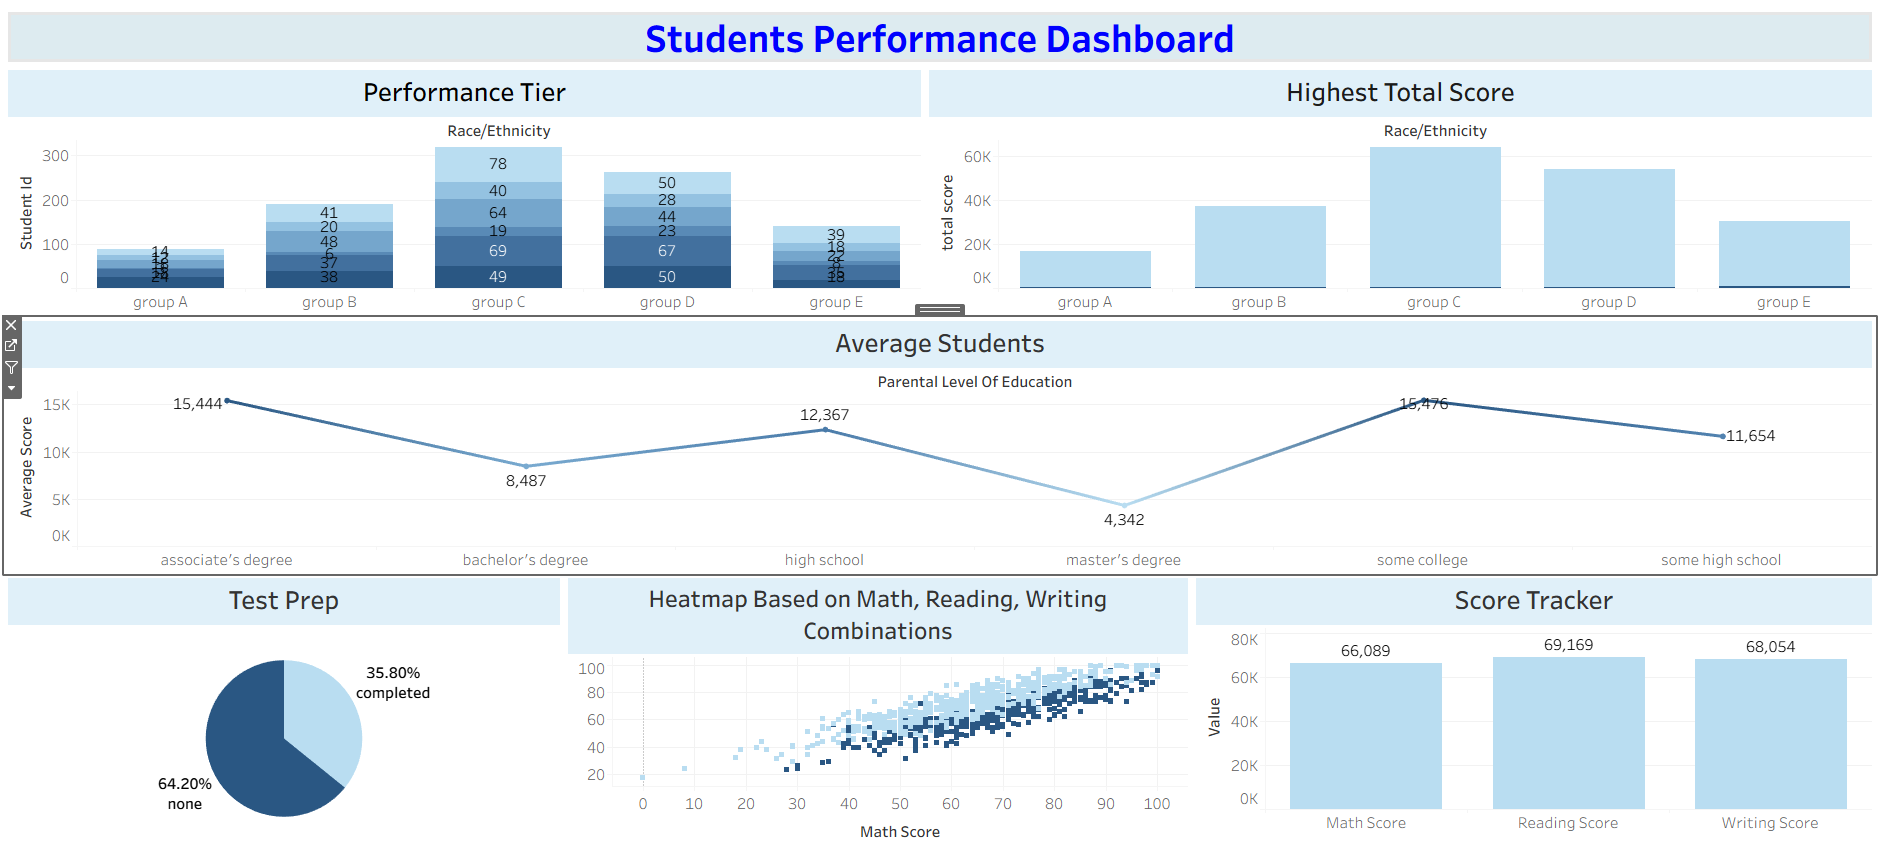